# Data Cleaning
## Checking/Detecting Missing Values

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# accessing csv file
df = pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling.csv')

In [4]:
df.info() #gives a quick information about the entire dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Gender** has 54 missing values <br>
**Age** has 300 missing values

The second way of finding null values in data set is using ***isnull()*** function.

In [7]:
print(df.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              54
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


## Handling Missing Values

***1. Deleting the columns containing null values***

In [10]:
updated_df=df.dropna(axis=1)

In [11]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values (**Gender** -> less than **1%** and **Age** -> **3%**). <br>
Should only be used if there are too many null values.

***2. Deleting the rows with missing data***

In [14]:
updated_df1=df.dropna(axis=0)

In [15]:
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9646 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9646 non-null   int64  
 1   CustomerId       9646 non-null   int64  
 2   Surname          9646 non-null   object 
 3   CreditScore      9646 non-null   int64  
 4   Geography        9646 non-null   object 
 5   Gender           9646 non-null   object 
 6   Age              9646 non-null   float64
 7   Tenure           9646 non-null   int64  
 8   Balance          9646 non-null   float64
 9   NumOfProducts    9646 non-null   int64  
 10  HasCrCard        9646 non-null   int64  
 11  IsActiveMember   9646 non-null   int64  
 12  EstimatedSalary  9646 non-null   float64
 13  Exited           9646 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In this case, there are possibilities of getting better accuracy than before. This might be because the columns contain more valuable information than we expected.

***3. Imputation - Filling the missing values***

In this case, we will be filling the missing values with a certain number. <br>
The possible ways to do this are: <br>
- Filling the missing data with **mean** or **median** value if it's a **numerical variable**.
- Filling the missing data with **mode** is it's a **categorical variable**.
- Filling the numerical value with **0** or **-999**, or some other number that will not occur in data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a **new type** for the missing values. 

In [19]:
mean_age=df["Age"].mean()
mean_age

38.910721649484536

In [20]:
median_age=df["Age"].median()
median_age

37.0

In [21]:
updated_df3=df
#updated_df3['Age']=updated_df3['Age'].fillna(mean_age)
updated_df3['Age']=updated_df3['Age'].fillna(median_age)
updated_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


***4. Forward & Backward filling i.e. ffill() & bfill()***

In [23]:
df = pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [25]:
updated_df4= df
#updated_df4['Age']= updated_df4['Age'].bfill()
updated_df4['Age']= updated_df4['Age'].ffill()

In [26]:
updated_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Feature Scaling
Feature scaling is a technique to normalize the range of independent variables (features) in your data. It is an essential preprocessing step in machine learning, especially for algorithms sensitive to the range of data, such as gradient descent-based methods or distance-based models but, sometimes we also use it in EDA process when required.

### Importance
- **Improves Model Performance:** Models like SVM, k-NN, and Logistic Regression rely on distance metrics. Features with larger ranges can dominate those with smaller ranges, leading to biased results.
- **Speeds Up Convergence:** For algorithms like Gradient Descent, scaling ensures faster convergence during optimization.
- **Avoids Bias:** Ensures that no single feature influences the model disproportionately.
### Common Methods of Feature Scaling
#### 1.Min-Max Scaling (Normalization)
- Rescales data to a fixed range, typically [0, 1].
- Formula:  ***X' = (X - Xmin) / (Xmax - Xmin)***
- **Use case:** Algorithms like k-NN or Neural Networks that rely on normalized input. (if your data is not normally distributed go for normalization)
#### 2.Standardization (Z-Score Normalization)
- Centers the data by subtracting the mean and scales it by the standard deviation.
- Formula: ***Z= (X - μ) / σ***
- **Use Case:** Algorithms like SVM, Logistic Regression, and PCA that assume normally distributed data. (if your data is somehow following the standardization technique i.e. the normal distribution technique, you should always go for standardization)
### When Not to Use Feature Scaling
- When features are categorical or binary (e.g., "Male" or "Female").
- Tree-based algorithms like Decision Trees, Random Forests, and XGBoost are scale-invariant and don't require scaling.

In [28]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df_fs1 = pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling.csv')

In [30]:
df_fs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Gender** has 54 missing values <br>
**Age** has 300 missing values

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
df_fs1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0


In [34]:
df_fs1.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,9700.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.91,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.48,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


#### ***Task-1*** Normalization

In [36]:
df_fs1.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0


In [37]:
df_fs2= pd.DataFrame(df_fs1, columns = ['Age', 'Tenure']) #creating a new df with only age and tenure columns

In [38]:
df_fs2.head(5)

,Age,Tenure
0,42.0,2
1,41.0,1
2,42.0,8
3,39.0,1
4,43.0,2


**Age** is tens place & **Tenure** is ones place column

In [40]:
# imputing the null values of Age
df_fs2['Age']= df_fs2['Age'].fillna(df_fs2['Age'].mean())
df_fs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10000 non-null  float64
 1   Tenure  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [41]:
# X' = (X - Xmin) / (Xmax - Xmin)
scaler= MinMaxScaler() #initializing the MinMaxScaler() functio
normalized_df_fs2= scaler.fit_transform(df_fs2)
print(normalized_df_fs2.round(2))

[[0.32 0.2 ]
 [0.31 0.1 ]
 [0.32 0.8 ]
 ...
 [0.24 0.7 ]
 [0.32 0.3 ]
 [0.14 0.4 ]]


#### Let's take another small example

In [43]:
x_arr = np.array([[2],[3],[5],[6],[6]])
x_arr

array([[2],
       [3],
       [5],
       [6],
       [6]])

In [44]:
# X' = (X - Xmin) / (Xmax - Xmin)
scaler= MinMaxScaler()
normalized_arr= scaler.fit_transform(x_arr)
print(normalized_arr)

[[0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]]


#### ***Task-2*** Standardization

In [46]:
# X' = (X - μ) / σ
scaler = StandardScaler() #initializing standardscaler() function
standardized_df_fs2=scaler.fit_transform(df_fs2)
print(standardized_df_fs2.round(2))

[[ 0.3  -1.04]
 [ 0.2  -1.39]
 [ 0.3   1.03]
 ...
 [-0.28  0.69]
 [ 0.3  -0.7 ]
 [-1.06 -0.35]]


#### Let's take another small example

In [48]:
# X' = (X - μ) / σ
scaler= StandardScaler()
normalized_arr_ss = scaler.fit_transform(x_arr)
print(normalized_arr_ss.round(2))

[[-1.48]
 [-0.86]
 [ 0.37]
 [ 0.98]
 [ 0.98]]


## Outlier Treatment
Outliers are data points that significantly deviate from other observations in the dataset. Properly handling outliers is crucial because they can distort statistical analyses and negatively impact machine learning models.
#### Common Methods for outlier treatment
**1.Remove Outliers:** If the outliers are due to data entry errors or are irrelevant to your analysis.
- **Use IQR:** Remove data outside ***[Q1 - 1.5 x IQR, Q3 + 1.5 x IQR]***
- **Use z-scores:** Remove data with ***∣z∣>3*** <br>

**2.Cap Outliers:**  If the outliers are extreme values but still carry important information, replace values below the lower bound ***Q1 - 1.5 x IQR*** or above the upper bound ***Q3 + 1.5 x IQR*** with the respective limits.

**3. Transform Data:** If outliers are skewing the data distribution, apply log, square root, or Box-Cox transformations to reduce the impact of outliers.
- **Log Transformation:** Compress large values ***X transformed = log(X+1)***
- **Square Root Transformation:** Reduces the impact of larger values.
- **Box-Cox Transformation:** Normalizes data.

**4. Impute Outliers:** When outliers are essential but must be adjusted for analysis, replace outliers with the mean, median, or mode. 

**5. model-Based Outlier Detection:** For complex datasets or when outliers are not easily identifiable use algorithms like 
- **Isolation Forest:** Detects anomalies by partitioning data.
- **DBSCAN:** A clustering method that identifies noise points as outliers
- **Local Outlier Factor:** Measures the local density deviation of a given data point.

to identify and handle outliers.

#### Conclusion: 
Outliers treatment depends on:
- The nature of your dataset.
- The impact on your model.
- The importance of preserving data integrity.


### 3-Sigma Technique (Standard Deviation)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [52]:
data = pd.read_csv('C:/Users/DELL/Downloads/raw_sales.csv')
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [53]:
type(data)

pandas.core.frame.DataFrame

In [54]:
# function to detect outliers from 1-d dataset
def find_outlier(data):
    # define a list to accumulate outliers
    outliers = []
    # set upper & lower limit to 3 SD
    random_data_std= statistics.stdev(data)
    random_data_mean= statistics.mean(data)
    # 3-SD
    outlier_cut_off= random_data_std*3
    lower_lim= random_data_mean - outlier_cut_off
    upper_lim= random_data_mean + outlier_cut_off
    # generate outliers
    for ol in data:
        if ol > upper_lim or ol < lower_lim:
            outliers.append(ol)
    return outliers      

### Outlier Cutoff: Definition and Calculation
The outlier cutoff is the threshold used to identify outliers in a dataset. It defines the range beyond which data points are considered outliers. The cutoff depends on the method used to detect outliers, such as the Standard Deviation (SD) or Interquartile Range (IQR).
#### Outlier Cut Off using SD:
This method assumes the data follows a normal distribution.

**Formula:** <br>*outlier cutoff=3xSD*

**Lower & Upper limits:**

*LL=Mean-Outlier Cutoff <br> UL=Mean+Outlier Cutoff*

#### Outlier cut off using IQR:
This method is more robust and works well for skewed datasets.

**Formula:** <br> *IQR=Q3-Q1 <BR> Outlier Cutoff= 1.5xIQR*
<br>
**Lower & Upper limits:**

*LL=Q1-1.5(IQR) <br> UL=Q3+Outlier Cutoff*

In [57]:
price_ol= find_outlier(data['price'])

In [58]:
len(price_ol)

461

In [59]:
len(data)

29580

(461/29580)*100=1.55% <br>
This means that outliers in price column are about **1.55%** i.e. 1.55% data are beyond the range of +-3SD.
If data was fully Normally Distributed then only **0.3%** so this clearly means that data is not fully ND.<br>
Now we will use skeweness function to seee if the data is skewed or not.

In [61]:
data.price.skew()

4.312009366902366

The data is positively skewed (right-skewed)

<Axes: xlabel='price', ylabel='Density'>

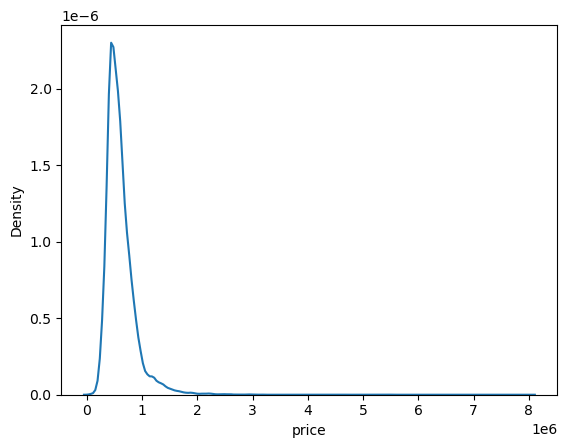

In [63]:
import seaborn as sns
sns.kdeplot(data.price)

**as outliers are skewing data distribution so now we will do transformations** <br>
### Log Transformation

In [65]:
data['price_transformed']= np.log(data.price)

In [66]:
price_transformed_ol= find_outlier(data.price_transformed)
len(price_transformed_ol)

266

In [67]:
len(data)

29580

(266/29580)*100=0.89% <br>
This means that outliers in price column are about **0.89%** i.e. 0.89% data are beyond the range of +-3SD. we need **0.3%**

In [69]:
data.price_transformed.skew()

0.4731646269984763

<Axes: xlabel='price_transformed', ylabel='Density'>

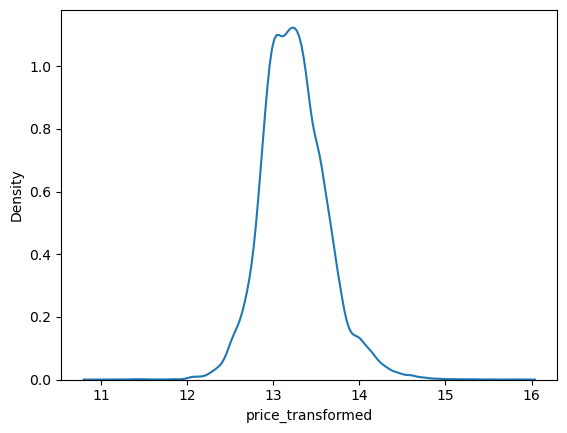

In [70]:
sns.kdeplot(data.price_transformed)

somewhat near to normal distribution but still not fullu normally distributed

In [72]:
data['price_transformed_2']= np.log(data.price_transformed) #double log transformation

In [73]:
price_transformed_2_ol= find_outlier(data.price_transformed_2)
len(price_transformed_2_ol)

251

In [74]:
len(data)

29580

(251/29580)*100=0.84% <br>
This means that outliers in price column are about **0.84%** i.e. 0.84% data are beyond the range of +-3SD. we need **0.3%**

In [76]:
data.price_transformed_2.skew()

0.33092530655758573

<Axes: xlabel='price_transformed_2', ylabel='Density'>

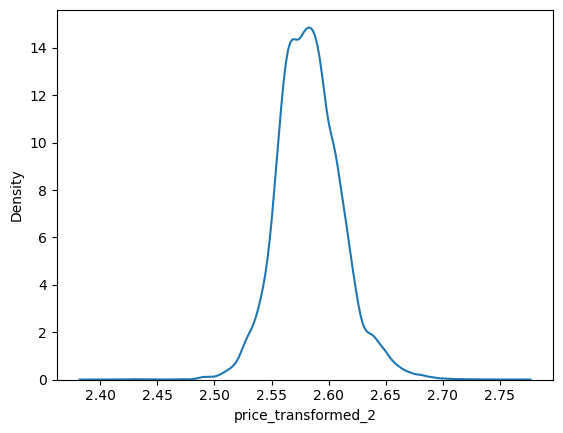

In [77]:
sns.kdeplot(data.price_transformed_2)

- Anything below 40 or above 80 are considered as outliers

### BoxPLot
visual way of identifying outliers

<Axes: >

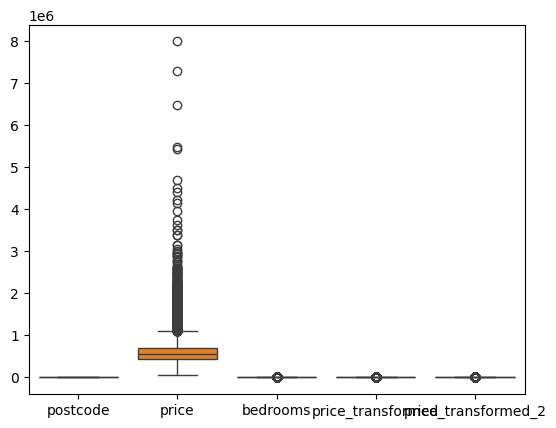

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data)

As you can see, it considers everything above 75 or below ~ 35 to be an outlier.

In [82]:
data.describe().round(2)

,postcode,price,bedrooms,price_transformed,price_transformed_2
count,29580.00,29580.00,29580.00,29580.00,29580.00
mean,2730.25,609736.26,3.25,13.24,2.58
std,146.72,281707.91,0.95,0.38,0.03
min,2600.00,56500.00,0.00,10.94,2.39
25%,2607.00,440000.00,3.00,12.99,2.56
50%,2615.00,550000.00,3.00,13.22,2.58
75%,2905.00,705000.00,4.00,13.47,2.60
max,2914.00,8000000.00,5.00,15.89,2.77


Q1(25%)=440,000   <br>  Q3(75%)=705,000 <br> IQR=Q3-Q1=265,000 <BR> Cutoff= 1.5xIQR= 397,500 <BR> LL=Q1-Cutoff=42,500 <BR> UL=Q3+Cutoff=1,102,500 <br> 
- Any price below **42,500** is an outlier (your min price is **56,500**, so no lower outliers).
- Any price above **1,102,500** is an outlier (your max price is **8,000,000**, which is far above this threshold → these are outliers).

In [84]:
import pandas as pd
df=pd.DataFrame(data)

In [85]:
len(df)

29580

In [86]:
df.describe().round(2)

,postcode,price,bedrooms,price_transformed,price_transformed_2
count,29580.00,29580.00,29580.00,29580.00,29580.00
mean,2730.25,609736.26,3.25,13.24,2.58
std,146.72,281707.91,0.95,0.38,0.03
min,2600.00,56500.00,0.00,10.94,2.39
25%,2607.00,440000.00,3.00,12.99,2.56
50%,2615.00,550000.00,3.00,13.22,2.58
75%,2905.00,705000.00,4.00,13.47,2.60
max,2914.00,8000000.00,5.00,15.89,2.77


#### Percentile concept

In [88]:
list1=[43,54,56,61,62,66,68,69,69,70,71,72,77,78,79,85,87,88,89,93,95,96,98,99,99]

In [89]:
len(list1)

25

In [90]:
min(list1)

43

In [91]:
max(list1)

99

In [92]:
import statistics
statistics.mean(list1)

76.96

In [93]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the **90th percentile** for these ordered scores, start by multiplying 90 percent times the total number of scores, which gives *90% x 25 = 0.90 x 25 = 22.5(index)*. Rounding it up to nearest whole numer, we get 23. this means 90th percentile is **98**.

To find **20th percentile**, *20% x (25+1) = 0.20 x 26 = 5.2(index)*, this means 20th percentile for this dataset is *(62 + 66)/2 = **64***.

In [96]:
statistics.median(sorted(list1))

77

The median (**50th percentile**) is **77**.

## Handling Invalid Values

**1.  Encode Unicode Properly:** <br>
- If data contains junk characters, it may be due to incorrect encoding.
- Fix by changing the encoding format, e.g., using CP1252 instead of UTF-8.
- Useful when dealing with multilingual text or improperly encoded files. <br>


**2.  Convert Incorrect Data Types:** <br>
- Data stored in the wrong format (e.g., numbers stored as strings) can cause errors.
- Convert data types for proper calculations:
  - "12,300" (string) → 12300 (integer)
  - "2013-Aug" (string) → "2013/08" (date)
  - "PIN Code 110001" (string) → "110001" (corrected number format <br>


**3. Correct Values That Go Beyond Range:** <br>
- Some values may be outside logical boundaries (e.g., temperatures below absolute zero -273°C).
- Either correct or remove such values.
- Example: If height data contains values like 800 cm, it may need correction or removal. <br>


**4. Correct Wrong Structure:** <br>
- If values don't follow a predefined structure, they should be fixed or removed.
- Example:
    - A pin code should have 6 digits (e.g., 110001); if it's 12 digits, it's incorrect.
    - A phone number should have 10 digits; a 12-digit number is likely an error.
<br>


These steps ensure **clean, structured, and usable data** for further analysis.

## Types Of Data

**1. Quantitative Data (Numerical):**
- Discrete Data
- Continuous Data

**2. Qualitative Data (Categorical):**
- Nominal
- Ordinal

## Types Of Analysis
**1. Univariate Analysis:**  
Univariate analysis refers to the analysis of a single variable to summarize its main characteristics and understand its distribution. It is one of the simplest forms of data analysis, and it’s essential for getting an initial sense of the dataset before diving into more complex analysis.
can be applied to both quantitative and qualitative data, but the techniques differ:
- **Quantitative:**
    - Descriptive Statistics:
        - Central Tendency: Mean, Median, Mode
        - Dispersion: Range, Variance, Standard Deviation
        - Distribution Shape: Skewness, Kurtosis
    - Visualizations:
        - Histogram, Box Plot, Bar Chart
- **Qualitative:**
    - Descriptive Statistics:
        - Frequency Distribution, Proportion/Percentage, Mode
    - Visualizations:
        - Bar Chart, Pie Chart
**2. Bivariate Analysis:**
Bivariate analysis examines the relationship between two variables, helping to identify patterns, correlations, or dependencies.
***TYPES:***
- **i. Numerical vs. Numerical:**
    - **Techniques:**
       - Correlation (Pearson, Spearman)
       - Scatter Plot
       - Regression Analysis
    - **Example:** Examining the relationship between study hours and exam scores.
- **ii. Numerical vs. Categorical:**
   - **Techniques:**
      - Grouped Statistics (Mean, Median by Category)
      - Box Plot
      - T-test, ANOVA
    - **Example:** Comparing average salaries across different job roles.
- **iii. Categorical vs. Categorical:**
    - **Techniques:**
      - Frequency Tables (Crosstabs)
      - Bar Chart
      - Chi-square Test
    - **Example:** Analyzing gender distribution across different professions.

**3. Multivariate Analysis:**
Same as Bivariate, examines three or more variables simultaneously to identify complex relationships, interactions, and patterns in the data.

**4. Numerical Analysis:**
- **i. Univariate Analysis:**
   - Focuses on statistical measures like mean, median, 25th & 75th percentiles, min, max, etc.
   - Helps understand the distribution and spread of individual numerical variables.
- **ii. Multivariate Analysis:**
   - Examines relationships between multiple numerical variables.
   - Uses techniques like correlation (Cov), heatmaps, and statistical comparisons.

#### Practical Understanding
**Dataset info:** Sample dataset containing customer data and showing customers who have left last month.

In [102]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [103]:
telco_base_data = pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling org.csv')

In [104]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [105]:
telco_new=telco_base_data[['Geography','Gender','Exited']]

In [106]:
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


### Univariate

In [108]:
telco_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [109]:
telco_new.Exited.value_counts()/len(telco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

Churn rate is **20.37%**<br>
Non_Churn rate is **79.63%**<br>

**Churn to Nonchurn ratio%:**

Churn=2037 <br> Non_Churn=7963<br> ratio%= (2037/7963)x100=25.6%

*The churn ratio is **25.6%***

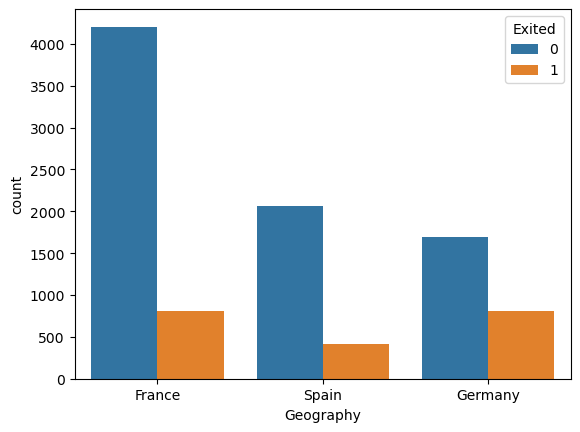

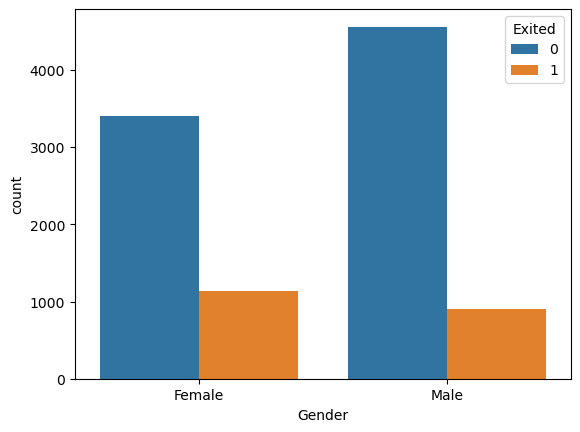

In [111]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=telco_new, x=predictor, hue='Exited') #using seaborn countplot

#### INSIGHTS:
**1. Geography:**
- **France:**<br>
Churn=800 <br> Non_Churn=4200<br> ratio%= (800/4200)x100=19.1%
- **Spain:**<br>
Churn=300 <br> Non_Churn=2200<br> ratio%= (300/2200)x100=13.6%
- **Germany:**<br>
Churn=800 <br> Non_Churn=1700<br> ratio%= (800/1700)x100=47.05%

**2. Gender:**
- **Female:**<br>
Churn=1200 <br> Non_Churn=3300<br> ratio%= (1200/3300)x100=36.3%
- **Male:**<br>
Churn=900 <br> Non_Churn=4800<br> ratio%= (900/4800)x100=18.75%
<br>


- *In case of **Germany** & **Female** we get high churn to non churn ratio i.e. churn rate is high in Germany & Females.*
- *People staying in Germany are more likely to churn.*
- *Females are more churners than Males.*

### Bivariate

Original Graph:


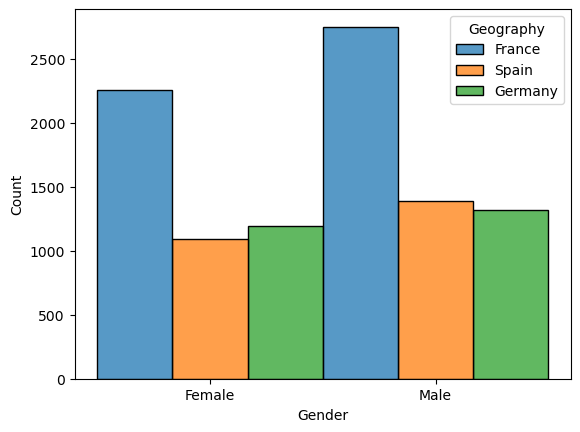

In [114]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat="count", multiple='dodge') #using seaborn histplot
print("Original Graph:")

In [115]:
telco_new_target1=telco_new.loc[telco_new['Exited']==1]

Churned Graph:


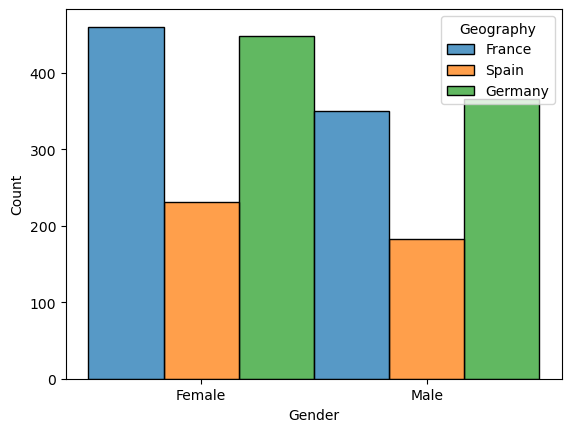

In [116]:
sns.histplot(x='Gender', hue='Geography', data=telco_new_target1, stat="count", multiple='dodge')
print("Churned Graph:")

**INSIGHTS:**
Comparing the Original Graph with the Churned Graph we get to know that *Germany has the highest churn rates with females being the most churners.*

### Numerical

**Correlation:** It ranges from -1 to +1
- +1 --> Positive Correlation
- -1 --> Negative Correlation
- ~0 --> No Correlation

In [119]:
numeric_data = telco_base_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix.head(10)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


#### Higher the Age -> people are most likely to Exit(churn) as there is +ve corr.
look at 4th row & 11th column intersection.

<Axes: >

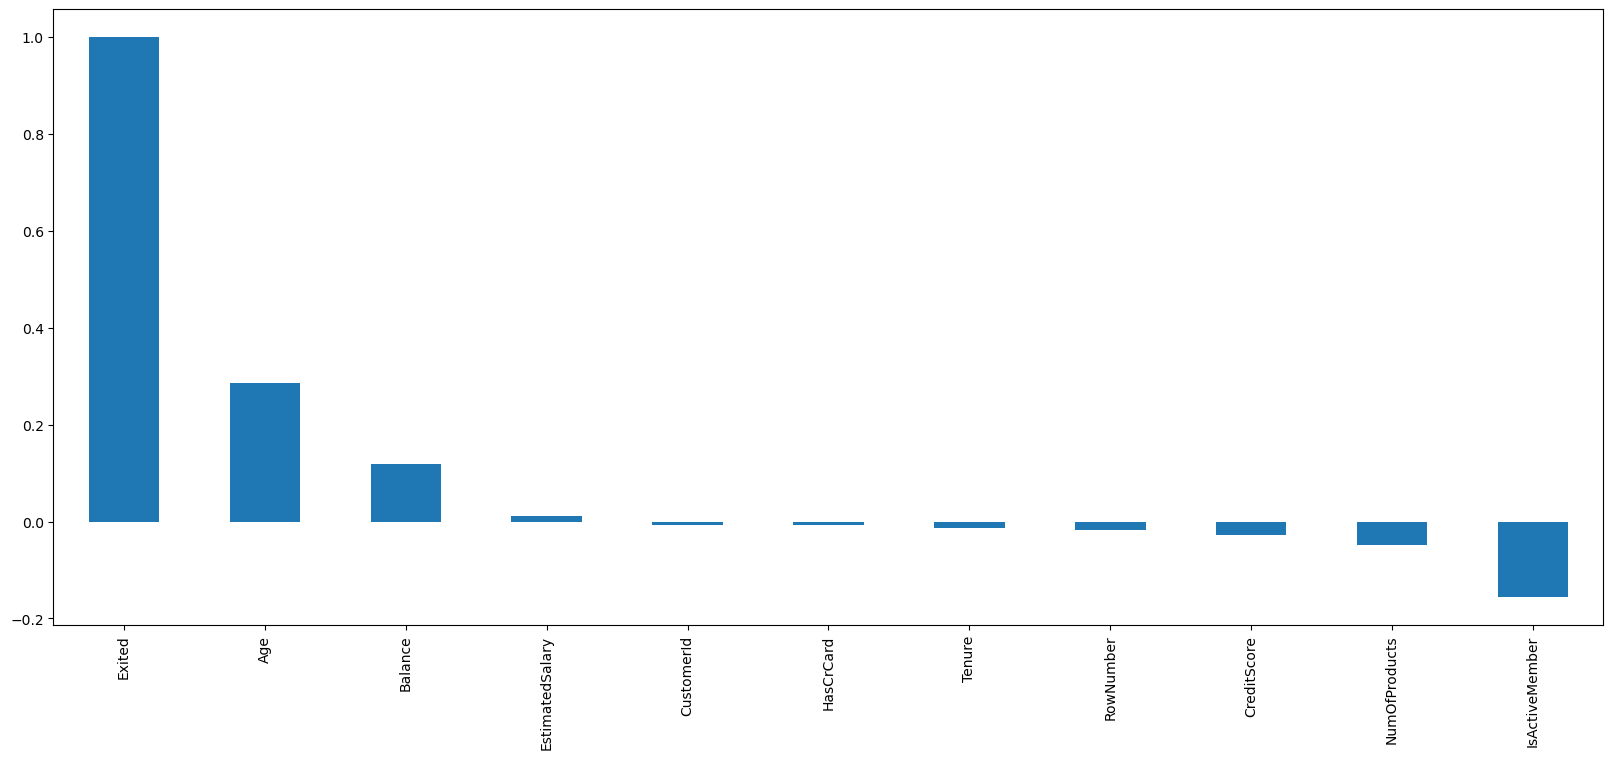

In [121]:
plt.figure(figsize=(20,8))
numeric_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

- **Age** & **Balance** are positively correlated with exited column.
- **NumOfProducts** & **IsActiveMember** are neatively correlated with exited 

<Axes: >

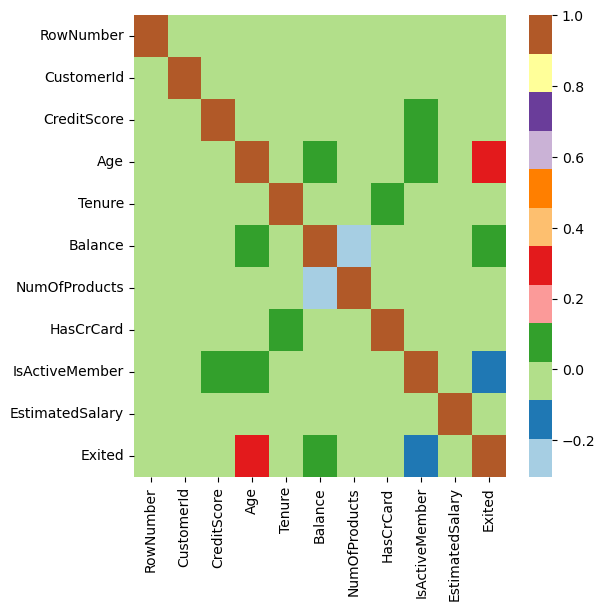

In [123]:
plt.figure(figsize=(6,6))
sns.heatmap(numeric_data.corr(), cmap='Paired') #using seaborn heat map

- **Age** wrt **Exited** is positively correlated.
- **Balance** wrt **NumOfProducts** & **NumOfProducts** wrt **Balance** -> negatively correlated.

In [125]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age'>

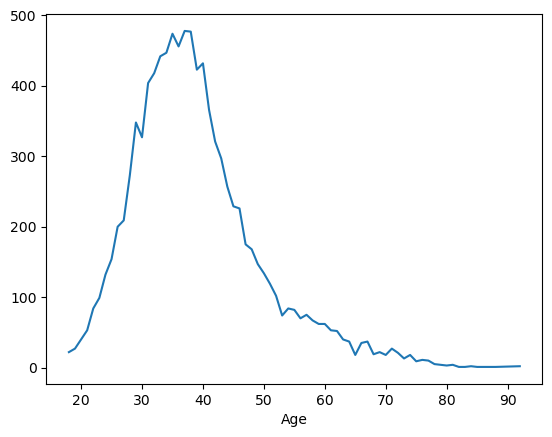

In [126]:
#for age
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

Most of the people lie b/w 20-55 i.e. avg age is in this range

<Axes: xlabel='Age'>

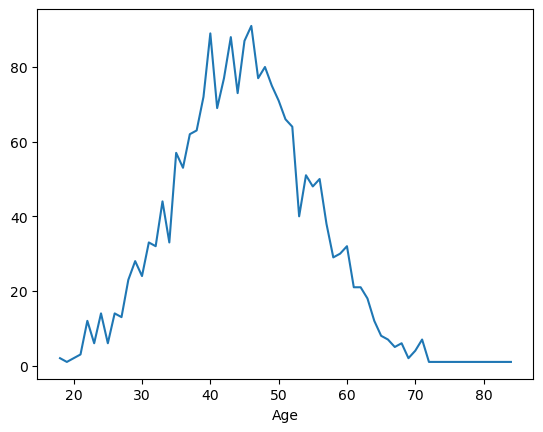

In [128]:
#for churn customers
telco_base_data_1 = telco_base_data.loc[telco_base_data['Exited']==1]
telco_base_data_1['Age'].value_counts().sort_index(ascending=True).plot()

Comparing original and churn data -> originally avg age is b/w 28-48 but churned age is b/w 40-55 i.e. higher the age of peopke, they are more likely to churn.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15300\3341543183.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot= sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)], color='red', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15300\3341543183.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot= sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)], color='blue', shade=True)


Text(0.5, 1.0, 'Age by churn')

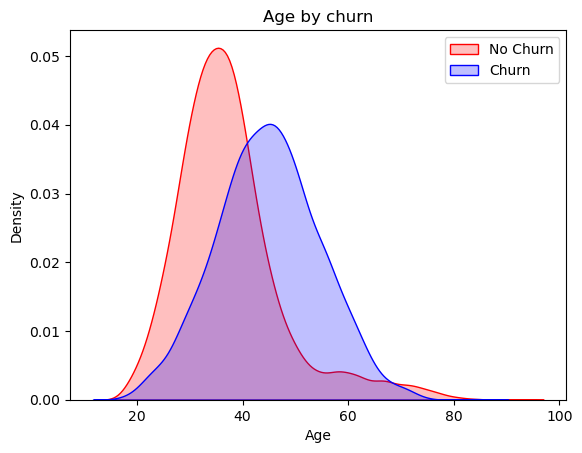

In [130]:
#kernel density estimation plot in seaborn
Tot= sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)], color='red', shade=True)
Tot= sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)], color='blue', shade=True)
Tot.legend(['No Churn','Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

### DERIVED METRICS:
These create new variables from existing data to extract insightful
information.
## Components:
- **1. Feature Encoding:** <br> Techniques like Label Encoding (LE), One-Hot Encoding (OHE), and others are used to convert categorical variables into a numerical format for analysis.
- **2. Feature Binning:** <br> Groups continuous variables into discrete buckets or ranges, such as age ranges (e.g., 0-20, 21-40).
- **3. From Domain Knowledge:** <br> Metrics can be derived based on understanding of the specific domain or context of the data, allowing for more tailored insights.
- **4. Calculated From Data:** <br> New metrics can directly be derived through mathematical calculations on existing data.

*These elements aim to enhance the interpretability and usefulness of the data during analysis.*

### FEATURE BINNING:
Feature binning is a data preprocessing technique used to transform continuous or numeric variables into categorical values. This can help in simplifying the model and improving its performance.


**1. Unsupervised Binning:** 
This type of binning transforms continuous variables into categorical values without considering the dependent variable (target variable).

- **Equal Width:** Divides the range of the continuous variable into intervals of equal width.

- **Equal Frequency:** Divides the continuous variable into intervals such that each interval contains approximately the same number of values.

**2. Supervised Binning:**
This type of binning considers the dependent variable when transforming continuous variables into categorical values.

- **Entropy-Based Binning:** This method separates the continuous variable into categories where the majority of values in each category belong to the same class label. It aims to maximize the homogeneity within each bin.

In [133]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [134]:
df_fb1=pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling.csv')

In [135]:
df_fb1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0


In [136]:
df_fb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [137]:
#dropping unnecessary columns
df_fb1.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [138]:
df_fb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           9946 non-null   object 
 3   Age              9700 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [139]:
#using Age for binning concept
df_fb1.Age.min()

18.0

In [140]:
df_fb1.Age.max()

92.0

In [141]:
labels=['0-20','21-40','41-60','61-80','Above 80']
bins=[0,20,40,60,80,100]
df_fb1['Age_bins']= pd.cut(df_fb1.Age, bins, labels=labels, include_lowest=True)

In [142]:
df_fb1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0,41-60


In [143]:
df_fb1[['Age', 'Age_bins']]

,Age,Age_bins
0,42.0,41-60
1,41.0,41-60
2,42.0,41-60
3,39.0,21-40
4,43.0,41-60
...,...,...
9995,39.0,21-40
9996,35.0,21-40
9997,36.0,21-40
9998,42.0,41-60


In [144]:
#you can also convert it into csv file to check in detail
df_fb1[['Age', 'Age_bins']].to_csv('EDA_FeatureBInning')

In [145]:
df_fb1.Age_bins.value_counts()

Age_bins
21-40       6147
41-60       3019
61-80        437
0-20          86
Above 80      11
Name: count, dtype: int64

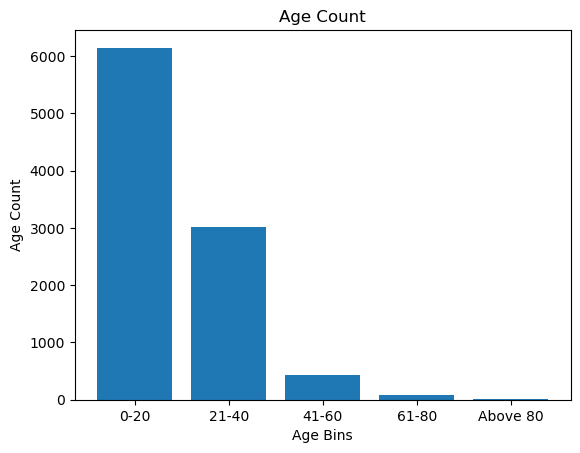

In [146]:
#plotting these bins using barchart
plt.bar(labels, df_fb1.Age_bins.value_counts())

#giving title
plt.title('Age Count')

#giving x & y labels
plt.xlabel('Age Bins')
plt.ylabel('Age Count')

#visualizing
plt.show()

In [147]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15300\2111627238.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i])


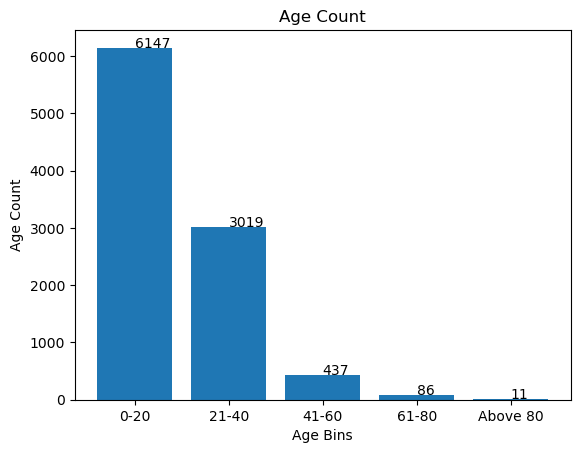

In [148]:
#plotting these bins using barchart
plt.bar(labels, df_fb1.Age_bins.value_counts())

#add labels
add_labels(labels, df_fb1.Age_bins.value_counts())

#giving title
plt.title('Age Count')

#giving x & y labels
plt.xlabel('Age Bins')
plt.ylabel('Age Count')

#visualizing
plt.show()

### Feature Encoding
Feature encoding is a crucial step in data preprocessing, especially when dealing with categorical data. Since many machine learning algorithms require numerical input, feature encoding techniques transform categorical variables into numerical formats.

#### 1. Label Encoding:
- **Purpose:** Converts categorical variables into numerical variables by assigning a unique numerical value to each category.
- **Example:** If you have a categorical variable "Color" with values ["Red", "Blue", "Green"], label encoding might transform it to [0, 1, 2].
- **Use Case:** Suitable for ordinal data where the order of categories matters.

#### 2. One-Hot Encoding:
- **Purpose:** Used for nominal categorical variables (where no order is implied). It creates binary columns for each category.
- **Example:** For the "Color" variable with values ["Red", "Blue", "Green"], one-hot encoding would create three binary columns: "Color_Red", "Color_Blue", "Color_Green", with values [1, 0, 0], [0, 1, 0], and [0, 0, 1] respectively.
- **Use Case:** Ideal for nominal data to avoid implying any ordinal relationship.

#### 3. Dummy Encoding:
Dummy encoding is a technique used to transform categorical variables into a numerical format that can be provided to machine learning algorithms. It is **one-hot encoding** but with a slight difference.
- **Purpose:** Converts categorical variables into binary (0 or 1) columns, but with one less column than the number of categories.
- **Process:** For a categorical variable with k categories, dummy encoding creates k-1 binary columns. One category is dropped to avoid multicollinearity (a situation where predictor variables are highly correlated).
- **Example:** Suppose you have a categorical variable "Color" with three categories: ["Red", "Blue", "Green"].<br>

One-Hot Encoding: Creates three binary columns:<br>

Color_Red: [1, 0, 0]<br>

Color_Blue: [0, 1, 0]<br>

Color_Green: [0, 0, 1]<br>

Dummy Encoding: Creates two binary columns (dropping one category, e.g., "Green"):<br>

Color_Red: [1, 0]<br>

Color_Blue: [0, 1]<br>
- **Use Case:**
   - ***Avoiding Multicollinearity:*** By dropping one category, dummy encoding avoids the issue of multicollinearity, which can affect the performance of some machine learning models, particularly linear models.
   - ***Interpretability:*** The dropped category serves as a reference category, making it easier to interpret the coefficients in linear models.

- **When to Use:**

  - ***Dummy Encoding:*** Preferred when you want to avoid multicollinearity and when the reference category is meaningful for interpretation.
  - ***One-Hot Encoding:*** Preferred when you need to represent all categories explicitly and when the model can handle multicollinearity.

#### 4. Target Encoding:
- **Purpose:** Replaces each category with the mean value of the dependent variable for that category.
- **Example:** If the target variable is "Price" and the categorical variable is "Color", target encoding would replace each color with the average price for that color.
- **Use Case:** Useful for high cardinality categorical variables and can help in capturing the relationship between the category and the target variable.

#### 5. Hash Encoding:
- **Purpose:** Represents categorical variables using a fixed number of dimensions (features) by applying a hash function.
- **Example:** If you have a categorical variable with many unique values, hash encoding can reduce the dimensionality by mapping categories to a fixed number of hash buckets.
- **Use Case:** Beneficial for handling high cardinality categorical variables with limited memory usage.

In [150]:
df_fb1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0,41-60


In [151]:
# doing Feature Encoding on GENDER column but first we will handle its null values
df_fb1.Gender.isnull().sum()

54

**54** null values in **Gender**

In [153]:
mode=df_fb1.Gender.mode()
mode

0    Male
Name: Gender, dtype: object

In [154]:
# filling null values with mode as GENDER is categorical
df_fb1['Gender']= df_fb1['Gender'].fillna('Male')

In [155]:
df_fb1.Gender.isnull().sum()

0

Now **0** null values in **Gender**.

#### Label Encoding

In [158]:
#using sklearn.preprocessing.LabelEncoder
le = preprocessing.LabelEncoder()
df_fb1['Gender_label']=le.fit_transform(df_fb1.Gender.values)

In [159]:
df_fb1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,Gender_label
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60,0
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60,0
3,699,France,Male,39.0,1,0.00,2,0,0,93826.63,0,21-40,1
4,850,Spain,Male,43.0,2,125510.82,1,1,1,79084.10,0,41-60,1


In [160]:
df_fb1.Gender_label.value_counts()

Gender_label
1    5486
0    4514
Name: count, dtype: int64

#### One-Hot Encoding

In [162]:
# using pandas.encoding
one_hot=pd.get_dummies(df_fb1['Geography'], dtype=int)

In [163]:
one_hot

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [164]:
df_fb1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,Gender_label
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60,0
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60,0
3,699,France,Male,39.0,1,0.00,2,0,0,93826.63,0,21-40,1
4,850,Spain,Male,43.0,2,125510.82,1,1,1,79084.10,0,41-60,1


In [165]:
# converting both categorical columns (gender, geography) into one-hot encoding
df_fb1_dummies=pd.get_dummies(df_fb1, dtype=int) 

df_fb1_dummies.head(5)

we also have gender_label columnnthat we made in label encoding but while doing one-hot its making redundant data and makes no sense so we will delete it .

#### Dummy Encoding

In [169]:
df_fb1_de=pd.get_dummies(df_fb1, drop_first=True, dtype=int)
df_fb1_de.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_label,Geography_Germany,Geography_Spain,Gender_Male,Age_bins_21-40,Age_bins_41-60,Age_bins_61-80,Age_bins_Above 80
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,1,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0,0,1,0,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,1,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,1,1,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,1,0,1,1,0,1,0,0


#### Target Encoding

In [171]:
from category_encoders import TargetEncoder

In [172]:
encoder= TargetEncoder()

In [173]:
df_2= pd.read_csv('C:/Users/DELL/Downloads/Churn_Modelling.csv')
df_2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [174]:
#dropping unnecessary columns
df_2.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [175]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           9946 non-null   object 
 3   Age              9700 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [176]:
# filling null values with mode as GENDER is categorical
df_2['Gender']= df_2['Gender'].fillna('Male')

In [177]:
df_2.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Male,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Male,43.0,2,125510.82,1,1,1,79084.10,0


In [178]:
encoder= TargetEncoder()
df_2['Gender Encoded']=encoder.fit_transform(df_2['Gender'], df_2['Exited'])

In [179]:
df_2.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender Encoded
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0.250997
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0.250997
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,0.250997
3,699,France,Male,39.0,1,0.00,2,0,0,93826.63,0,0.164783
4,850,Spain,Male,43.0,2,125510.82,1,1,1,79084.10,0,0.164783


now instead of gender you can use gender encoded

In [181]:
df_2['Gender Encoded'].value_counts()

Gender Encoded
0.164783    5486
0.250997    4514
Name: count, dtype: int64

#### Benefits of Target Encoding:
- Target Encoding is a simple & quick encoding method that does not add to the dimensionality of the dataset. Therefore, it may be used as a good first try technique.
  - (it means that after creating 'Gender Encoded' you will not consider 'Gender' Column i.e. you will delete it , so dimensions remain same as before -> adding 1 col & deleting 1 col. However in one-hot you create new features, disturbing the original dimensions of the given dataset.
  - imagine having 100 of locations in 'Location' column, then if we do one-hot encoding we will end up with 100 new columns and in dummy encoding we will end up creating 99 new columns so, target encoding is best in this case.
- But we usually don't go for Target Encoding.
#### Limitations of Target Encoding:
- It is dependent on the target distribution which means target encoding requires careful validation as it can be prone to overfitting.
  - overfitting is one of the scenarios in predictive analytics which occurs when you are able to achieve a good accuracy or a good performance in your training data but when you are trying to test it on a testing data which is unseen to the model, your accuracy decreases.

#### Hash Encoding

In [184]:
from  category_encoders import HashingEncoder

In [185]:
X = df_2.Gender

In [186]:
Y= df_2.Exited

In [187]:
hash_encoder= HashingEncoder(cols=['Gender'])
hash_encoder.fit_transform(X,Y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0
9996,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,1,0,0


In [188]:
Z = df_2.Geography

In [189]:
hash_encoder= HashingEncoder(cols=['Geography'])
hash_encoder.fit_transform(Z,Y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,1


In [190]:
hash_encoder= HashingEncoder(n_components=16,cols=['Geography'])
hash_encoder.fit_transform(Z,Y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
